# Plotting Query Results

## Setup

In [1]:
# Import Matplot lib
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
# Import SQLAlchemy `automap` and other dependencies here
# YOUR CODE HERE
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect

In [4]:
# Create an engine for the `emoji.sqlite` database
engine = create_engine("sqlite:///../Resources/emoji.sqlite", echo=False)

## Explore Database

In [5]:
# Use the Inspector to explore the database and print the table names
# YOUR CODE HERE
inspector = inspect(engine)

In [6]:
# Use Inspector to print the column names and types
# YOUR CODE HERE
columns = inspector.get_columns('emoji')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
emoji_char TEXT
emoji_id TEXT
name TEXT
score INTEGER


In [7]:
# Use `engine.execute` to select and display the first 10 rows from the emoji table
# YOUR CODE HERE

results = engine.execute('SELECT * from emoji limit 10')
for i in results:
    print (i)

(1, '😂', '1F602', 'FACE WITH TEARS OF JOY', 1814832150)
(2, '❤️', '2764', 'HEAVY BLACK HEART', 840619939)
(3, '😍', '1F60D', 'SMILING FACE WITH HEART-SHAPED EYES', 680382416)
(4, '♥️', '2665', 'BLACK HEART SUIT', 652715459)
(5, '😭', '1F62D', 'LOUDLY CRYING FACE', 515991922)
(6, '😊', '1F60A', 'SMILING FACE WITH SMILING EYES', 484540701)
(7, '♻️', '267B', 'BLACK UNIVERSAL RECYCLING SYMBOL', 452489849)
(8, '😒', '1F612', 'UNAMUSED FACE', 441690175)
(9, '💕', '1F495', 'TWO HEARTS', 381679908)
(10, '😘', '1F618', 'FACE THROWING A KISS', 377847645)


## Reflect database and Query

In [8]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Emoji = Base.classes.emoji

In [9]:
# Start a session to query the database
session = Session(engine)

Use Matplotlib to create a horizontal bar chart and plot the emoji `score` in descending order. Use `emoji_char` as the y-axis labels. Plot only the top 10 emojis ranked by score

In [13]:
# Query Emojis for `emoji_char`, `emoji_id`, and `score` and save the query into results
# YOUR CODE HERE
results=session.query(Emoji.emoji_char, Emoji.emoji_id, Emoji.score).limit(10).all()
results_df = pd.DataFrame(results)
new_df = results_df.sort_values(by=['score'], ascending=False)

In [14]:
top_emojis = new_df.head(10)
top_emojis

,emoji_char,emoji_id,score
0,😂,1F602,1814832150
1,❤️,2764,840619939
2,😍,1F60D,680382416
3,♥️,2665,652715459
4,😭,1F62D,515991922
5,😊,1F60A,484540701
6,♻️,267B,452489849
7,😒,1F612,441690175
8,💕,1F495,381679908
9,😘,1F618,377847645


Unpack tuples using list comprehensions

In [15]:
# Unpack the `emoji_id` and `scores` from results and save into separate lists
# YOUR CODE HERE
for row in results:
   print (row.emoji_char, row.score)

😂 1814832150
❤️ 840619939
😍 680382416
♥️ 652715459
😭 515991922
😊 484540701
♻️ 452489849
😒 441690175
💕 381679908
😘 377847645


## Plot using Matplotlib

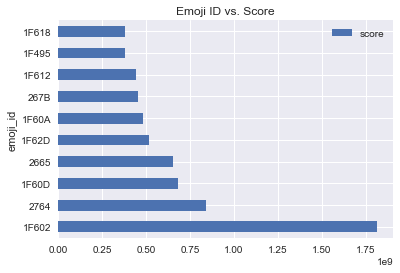

In [20]:
# Create a horizontal bar chart and plot the `emoji_id` on the y-axis and the `score` on the x-axis
# Challenge: Try to plot the scores in descending order on the graph (The largest score is at the top)
# YOUR CODE HERE
ax = top_emojis.plot.barh(x="emoji_id", y="score");
plt.title('Emoji ID vs. Score')
plt.show()

## Plot using Pandas Plotting

Load the results into a Pandas DataFrame

In [22]:
# Load the results into a pandas dataframe. Set the index to the `emoji_id`
# YOUR CODE HERE
top_emojis = pd.DataFrame(data = results).head(10);

top_emojis2 = top_emojis.set_index("emoji_id")

top_emojis2

,emoji_char,score
emoji_id,,
1F602,😂,1814832150
2764,❤️,840619939
1F60D,😍,680382416
2665,♥️,652715459
1F62D,😭,515991922
1F60A,😊,484540701
267B,♻️,452489849
1F612,😒,441690175
1F495,💕,381679908


Plot using Pandas

Text(0.5, 1.0, 'Emoji ID vs. Score')

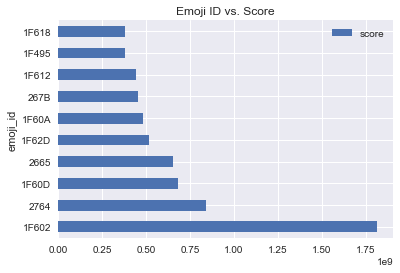

In [24]:
# Plot the dataframe as a horizontal bar chart using pandas plotting
# YOUR CODE HERE
top_emojis2.head(10).plot(kind='barh')
plt.title('Emoji ID vs. Score')

In [26]:
# BONUS: Use Pandas `read_sql_query` to load a query statement directly into the DataFrame
# YOUR CODE HERE
conn = engine.connect()
query = pd.read_sql_query('select * from emoji LIMIT 10;', conn)
query

,id,emoji_char,emoji_id,name,score
0,1,😂,1F602,FACE WITH TEARS OF JOY,1814832150
1,2,❤️,2764,HEAVY BLACK HEART,840619939
2,3,😍,1F60D,SMILING FACE WITH HEART-SHAPED EYES,680382416
3,4,♥️,2665,BLACK HEART SUIT,652715459
4,5,😭,1F62D,LOUDLY CRYING FACE,515991922
5,6,😊,1F60A,SMILING FACE WITH SMILING EYES,484540701
6,7,♻️,267B,BLACK UNIVERSAL RECYCLING SYMBOL,452489849
7,8,😒,1F612,UNAMUSED FACE,441690175
8,9,💕,1F495,TWO HEARTS,381679908
9,10,😘,1F618,FACE THROWING A KISS,377847645
